In [2]:
from sklearn.datasets import fetch_mldata
import numpy as np

In [3]:
np.random.seed(42)

In [4]:
mnist = fetch_mldata('MNIST original', data_home='/datasets/mnist_dataset/')

In [5]:
X,y=mnist['data'],mnist['target']

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

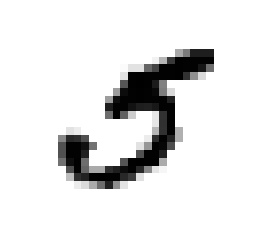

In [7]:
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [10]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [14]:
skfolds=StratifiedKFold(n_splits=3,random_state=42)

In [15]:
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_fold=X_train[train_index]
    y_train_fold=(y_train_5[train_index])
    X_test_fold=X_train[test_index]
    y_test_fold=(y_train_5[test_index])
    print(train_index)
    clone_clf.fit(X_train_fold,y_train_fold)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

[19844 19852 19878 ..., 59997 59998 59999]
0.9502
[    0     1     2 ..., 59997 59998 59999]
0.96565
[    0     1     2 ..., 40065 40066 40067]
0.96495


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.9502 ,  0.96565,  0.96495])

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [19]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.76871350203503808

In [20]:
recall_score(y_train_5, y_train_pred)

0.80132816823464303

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.78468208092485547

In [22]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([ 161855.74572176])

In [23]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [25]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [26]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Thresholds",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.xlim([-700000,700000])
    plt.ylim([0,1])

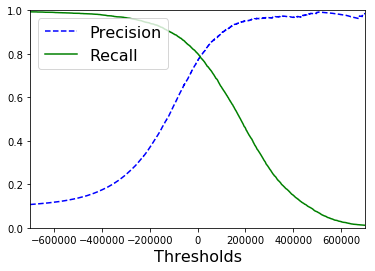

In [27]:
plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()

In [28]:
y_train_pred_90=(y_scores>70000)

In [29]:
precision_score(y_train_5,y_train_pred_90)

0.86592051164915484

In [30]:
recall_score(y_train_5, y_train_pred_90)

0.69931746910164172

In [32]:
from sklearn.metrics import roc_curve

In [33]:
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [34]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Postive Rate',fontsize=16)
    

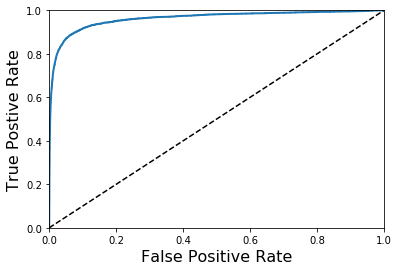

In [35]:
plot_roc_curve(fpr,tpr)

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.96244965559671547

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [ ]:
y_scores_forest=y_probas_forest[:,1]

In [ ]:
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [ ]:
roc_auc_score(y_train_5,y_scores_forest)

In [ ]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

In [ ]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)

In [ ]:
sgd_clf.classes_

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

In [ ]:
forest_clf.predict_proba([some_digit])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

In [ ]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)

In [ ]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [ ]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [41]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

In [42]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_train,cv=3)
f1_score(y_train,y_train_knn_pred,average="macro")

In [ ]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise

In [ ]:
y_train_mod=X_train
y_test_mod=X_test

In [ ]:
some_index = 5500
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])

In [ ]:
clean_digit

In [ ]:
#EXERCISES 1

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parametres={'n_neighbors':[3,5,8],'weights':['uniform','distanc']}

In [46]:
grid=GridSearchCV(knn_clf,parametres,cv=3,verbose=3,scoring="accuracy")

In [47]:
grid

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 8], 'weights': ['uniform', 'distanc']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_neighbors=3, weights=uniform ..................................
